<a href="https://colab.research.google.com/github/GladwelWanjau/Week-13-Moringa-Datascience-Core-IP/blob/main/Week_13_IP_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the problem
The research problem in this case is to find out individuals that are likely to click on a blog advert based on their characteristics which include;
Age
Daily Time spent on site
Area of residence
Internet Usage
Gender
Country of residence


# Metric of Success
The metric success of this project is to identify individuals that are likely to click on the add after performing exploratory data analysis.


# Data Relevance
The data provided by the client is from the performance of a previous blog advert on the same website.
The columns are as follows:
Daily Time Spent on the site-Integer,
Age-Age of the individual browsing-Integer,
Area of residence
Internet Usage
Gender of the browsing individual
Country of Residence


# Understanding the Context
A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. She would now like to employ your services as a Data Science Consultant to help her identify which individuals are most likely to click on her ads. 

# Experimental Design
1.Data Loading
2.Data cleaning for missing values and outliers
3.Exploratory Data Analysis
4.Conclusion-Detecting the trend in behaviour.


# Data Loading and Cleaning

In [ ]:
!jupyter-kernelspec list

Available kernels:
  ir         /usr/local/share/jupyter/kernels/ir
  python2    /usr/local/share/jupyter/kernels/python2
  python3    /usr/local/share/jupyter/kernels/python3
  swift      /usr/local/share/jupyter/kernels/swift


In [ ]:
# activate R magic
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
advertising_dataset =read.csv('https://ia803104.us.archive.org/27/items/advertising_201910/advertising.csv',header = TRUE,
                 sep = ",",fileEncoding = "UTF-8-BOM")
head(advertising_dataset)



  Daily.Time.Spent.on.Site Age Area.Income Daily.Internet.Usage
1                    68.95  35    61833.90               256.09
2                    80.23  31    68441.85               193.77
3                    69.47  26    59785.94               236.50
4                    74.15  29    54806.18               245.89
5                    68.37  35    73889.99               225.58
6                    59.99  23    59761.56               226.74
                          Ad.Topic.Line           City Male    Country
1    Cloned 5thgeneration orchestration    Wrightburgh    0    Tunisia
2    Monitored national standardization      West Jodi    1      Nauru
3      Organic bottom-line service-desk       Davidton    0 San Marino
4 Triple-buffered reciprocal time-frame West Terrifurt    1      Italy
5         Robust logistical utilization   South Manuel    0    Iceland
6       Sharable client-driven software      Jamieberg    1     Norway
            Timestamp Clicked.on.Ad
1 2016-03-27 00:53:

In [ ]:
%%R
#Checking for missing values using the complete function
advertising_dataset[!complete.cases(advertising_dataset),]
#All the columns are complete hence no missing value

 [1] Daily.Time.Spent.on.Site Age                      Area.Income             
 [4] Daily.Internet.Usage     Ad.Topic.Line            City                    
 [7] Male                     Country                  Timestamp               
[10] Clicked.on.Ad           
<0 rows> (or 0-length row.names)


In [ ]:
%%R
#Rechecking the sum of missing values to ascertain the above finding
colSums(is.na(advertising_dataset))
#There are no missing values

Daily.Time.Spent.on.Site                      Age              Area.Income 
                       0                        0                        0 
    Daily.Internet.Usage            Ad.Topic.Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked.on.Ad 
                       0 


In [ ]:
%%R
class(advertising_dataset)

[1] "data.frame"


In [ ]:
%%R
outlier(advertisng_dataset, opposite = FALSE, logical = FALSE)

R[write to console]: Error in outlier(advertisng_dataset, opposite = FALSE, logical = FALSE) : 
  could not find function "outlier"
Calls: <Anonymous> -> <Anonymous> -> withVisible




Error in outlier(advertisng_dataset, opposite = FALSE, logical = FALSE) : 
  could not find function "outlier"
Calls: <Anonymous> -> <Anonymous> -> withVisible


In [ ]:
%%R
#Checking for duplicated values in the columns
duplicated_rows <- advertising_dataset[duplicated(advertising_dataset),]

In [ ]:
%%R
advertising_dataset_m<-mean(advertising_dataset)
advertising_dataset_m

[1] NA


In [ ]:
%%R
library(tidyverse)

In [ ]:
%%R
#For ease in analysis,we convert the data into a tibble
my_data<-as_tibble(advertising_dataset)
my_data

# A tibble: 1,000 x 10
   Daily.Time.Spen…   Age Area.Income Daily.Internet.… Ad.Topic.Line City   Male
              <dbl> <int>       <dbl>            <dbl> <chr>         <chr> <int>
 1             69.0    35      61834.             256. Cloned 5thge… Wrig…     0
 2             80.2    31      68442.             194. Monitored na… West…     1
 3             69.5    26      59786.             236. Organic bott… Davi…     0
 4             74.2    29      54806.             246. Triple-buffe… West…     1
 5             68.4    35      73890.             226. Robust logis… Sout…     0
 6             60.0    23      59762.             227. Sharable cli… Jami…     1
 7             88.9    33      53853.             208. Enhanced ded… Bran…     0
 8             66      48      24593.             132. Reactive loc… Port…     1
 9             74.5    30      68862              222. Configurable… West…     1
10             69.9    20      55642.             184. Mandatory ho… Rami…     1
# … w

In [ ]:
%%R
#Checking the data types of the columns
Numeric=my_data %>% select_if(is.numeric)
Numeric
#The following columns have numeric datatyp:Daily Time Spent on site,Age,Area,Income,Daily Internet Usage,gender and whether the individual clicked on the add.

# A tibble: 1,000 x 6
   Daily.Time.Spent.on…   Age Area.Income Daily.Internet.Us…  Male Clicked.on.Ad
                  <dbl> <int>       <dbl>              <dbl> <int>         <int>
 1                 69.0    35      61834.               256.     0             0
 2                 80.2    31      68442.               194.     1             0
 3                 69.5    26      59786.               236.     0             0
 4                 74.2    29      54806.               246.     1             0
 5                 68.4    35      73890.               226.     0             0
 6                 60.0    23      59762.               227.     1             0
 7                 88.9    33      53853.               208.     0             0
 8                 66      48      24593.               132.     1             1
 9                 74.5    30      68862                222.     1             0
10                 69.9    20      55642.               184.     1             0
# … wi

In [ ]:
%%R
#Checking the data types of the columns
Categorical=my_data %>% select_if(is.character)
Categorical
#The following columns have character datatype:Ad topic line,City,Country and Timestamp.

# A tibble: 1,000 x 4
   Ad.Topic.Line                     City            Country   Timestamp        
   <chr>                             <chr>           <chr>     <chr>            
 1 Cloned 5thgeneration orchestrati… Wrightburgh     Tunisia   2016-03-27 00:53…
 2 Monitored national standardizati… West Jodi       Nauru     2016-04-04 01:39…
 3 Organic bottom-line service-desk  Davidton        San Mari… 2016-03-13 20:35…
 4 Triple-buffered reciprocal time-… West Terrifurt  Italy     2016-01-10 02:31…
 5 Robust logistical utilization     South Manuel    Iceland   2016-06-03 03:36…
 6 Sharable client-driven software   Jamieberg       Norway    2016-05-19 14:30…
 7 Enhanced dedicated support        Brandonstad     Myanmar   2016-01-28 20:59…
 8 Reactive local challenge          Port Jefferybu… Australia 2016-03-07 01:40…
 9 Configurable coherent function    West Colin      Grenada   2016-04-18 09:33…
10 Mandatory homogeneous architectu… Ramirezton      Ghana     2016-07-11 01:42…
# … wi

# Univariate Analysis

# **1.Numerical Data**

In [ ]:
%%R
#Finding the mean
Age_m<-mean(advertising_dataset$Age)
print(Age_m)
#Finding the median
Age_m1<-median(advertising_dataset$Age)
print(Age_m1)
#Finding the maximum value in the age column
Age_Max<-max(advertising_dataset$Age)
print(Age_Max)
#Finding the minimum value in the age column
Age_Min<-min(advertising_dataset$Age)
print(Age_Min)
#Finding the range value of the age column
Age_Range<-range(advertising_dataset$Age)
print(Age_Range)
#Finding the variance of the age column
Age_Variance<-var(advertising_dataset$Age)
print(Age_Variance)
#Finding the standard deviation of the age column
Age_Sd<-sd(advertising_dataset$Age)
print(Age_Sd)



[1] 36.009
[1] 35
[1] 61
[1] 19
[1] 19 61
[1] 77.18611
[1] 8.785562


In [ ]:
#Finding the mode
%%R
v<-my_data %>% pull(Age)
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
Age.Mode<-getmode(advertising_dataset$Age)
Age.Mode
#The modal age is 31 years

[1] 31


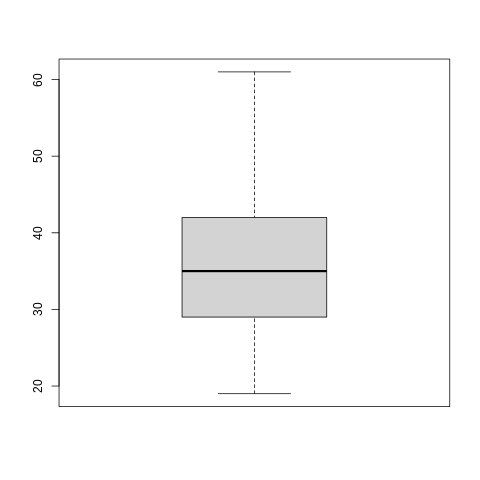

In [ ]:
%%R
#Checking the outliers in the Age Column.
boxplot(advertising_dataset$Age)

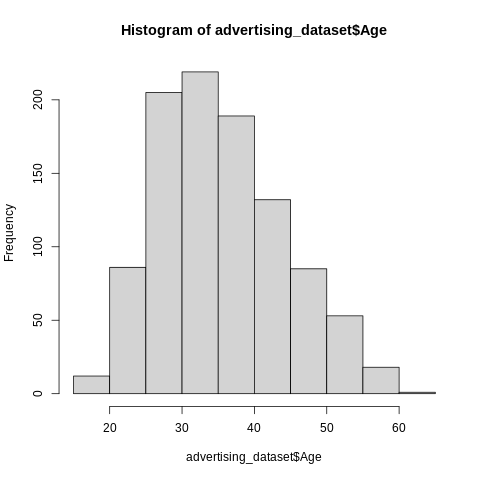

In [ ]:
%%R
#Checking the distribution of Age
hist(advertising_dataset$Age)

In [ ]:
%%R
#Finding the mean
DTS_m<-mean(advertising_dataset$Daily.Time.Spent.on.Site)
print(DTS_m)
#Finding the median
DTS_m1<-median(advertising_dataset$Daily.Time.Spent.on.Site)
print(DTS_m1)
#Finding the maximum value in the Daily Time Spent on Site column
DTS_Max<-max(advertising_dataset$Daily.Time.Spent.on.Site)
print(DTS_Max)
#Finding the minimum value in the Daily Time Spent on Site column
DTS_Min<-min(advertising_dataset$Daily.Time.Spent.on.Site)
print(DTS_Min)
#Finding the range value of the Daily Time Spent on Site column
DTS_Range<-range(advertising_dataset$Daily.Time.Spent.on.Site)
print(DTS_Range)
#Finding the variance of the Daily Time Spent on Site column
DTS_Variance<-var(advertising_dataset$Daily.Time.Spent.on.Site)
print(DTS_Variance)
#Finding the standard deviation of the Daily Time Spent on Site column
DTS_Sd<-sd(advertising_dataset$Daily.Time.Spent.on.Site)
print(DTS_Sd)

[1] 65.0002
[1] 68.215
[1] 91.43
[1] 32.6
[1] 32.60 91.43
[1] 251.3371
[1] 15.85361


In [ ]:
#Finding the mode
%%R
v<-my_data %>% pull(Daily.Time.Spent.on.Site)
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
DTS.Mode<-getmode(advertising_dataset$Daily.Time.Spent.on.Site)
DTS.Mode
#The modal time is 62.26 minutes.

[1] 62.26


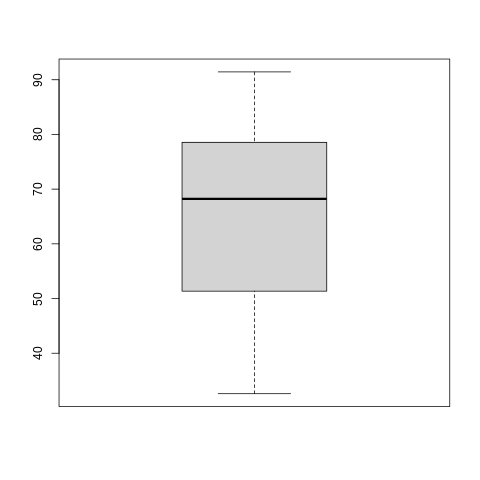

In [ ]:
%%R
#Checking for Outliers in the Daily Time Spent on Site Column
boxplot(advertising_dataset$Daily.Time.Spent.on.Site)

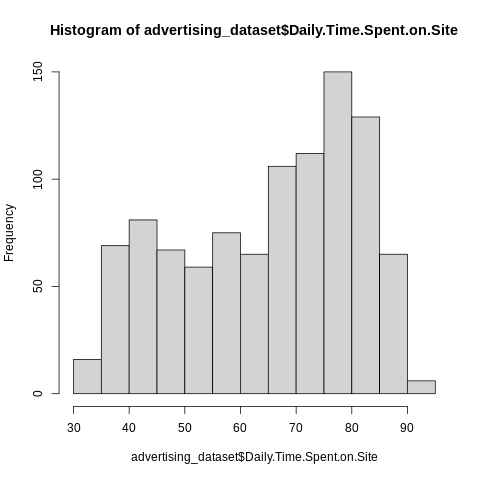

In [ ]:
%%R
#Checking the distribution of Daily Time Spent on Site
hist(advertising_dataset$Daily.Time.Spent.on.Site)

In [ ]:
%%R
#Finding the mean
AI_m<-mean(advertising_dataset$Area.Income)
print(AI_m)
#Finding the median
AI_m1<-median(advertising_dataset$Area.Income)
print(AI_m1)
#Finding the maximum value in the Area Income column
AI_Max<-max(advertising_dataset$Area.Income)
print(AI_Max)
#Finding the minimum value in the Area Income column
AI_Min<-min(advertising_dataset$Area.Income)
print(AI_Min)
#Finding the range value of the Area Income column
AI_Range<-range(advertising_dataset$Area.Income)
print(AI_Range)
#Finding the variance of the Area Income column
AI_Variance<-var(advertising_dataset$Area.Income)
print(AI_Variance)
#Finding the standard deviation Area Income column
AI_Sd<-sd(advertising_dataset$Area.Income)
print(AI_Sd)

[1] 55000
[1] 57012.3
[1] 79484.8
[1] 13996.5
[1] 13996.5 79484.8
[1] 179952406
[1] 13414.63


In [ ]:
#Finding the mode
%%R
v<-my_data %>% pull(Area.Income)
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
AI.Mode<-getmode(advertising_dataset$Area.Income)
AI.Mode
#The modal Area Income is 61,833.90.

[1] 61833.9


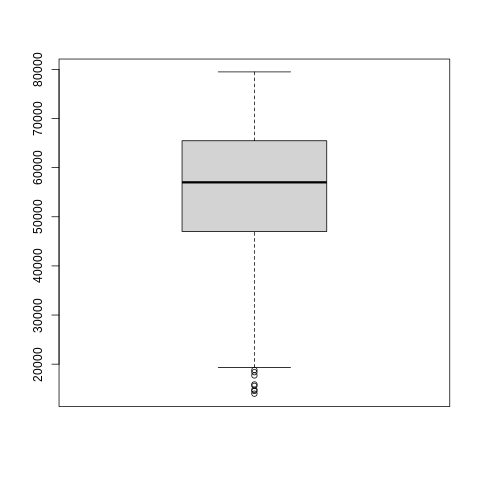

In [ ]:
%%R
#Checking for outliers in the Area Income column.
boxplot(advertising_dataset$Area.Income)

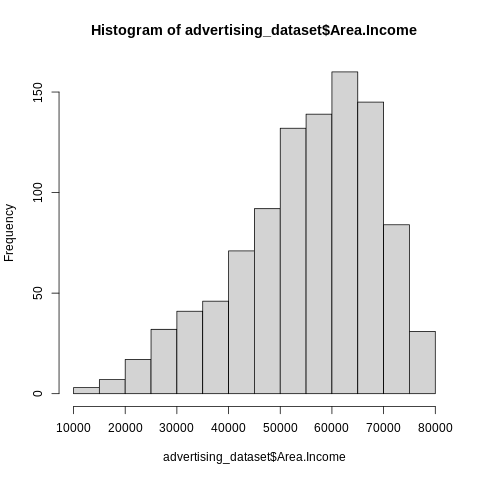

In [ ]:
%%R
#Checking the distribution of Area Income
hist(advertising_dataset$Area.Income)

In [ ]:
%%R
#Finding the mean
DIU_m<-mean(advertising_dataset$Daily.Internet.Usage)
print(DIU_m)
#Finding the median
DIU_m1<-median(advertising_dataset$Daily.Internet.Usage)
print(DIU_m1)
#Finding the maximum value in the Daily Internet Usage column
DIU_Max<-max(advertising_dataset$Daily.Internet.Usage)
print(DIU_Max)
#Finding the minimum value in the Daily Internet Usage column
DIU_Min<-min(advertising_dataset$Daily.Internet.Usage)
print(DIU_Min)
#Finding the range value of the Daily Internet Usagecolumn
DIU_Range<-range(advertising_dataset$Daily.Internet.Usage)
print(DIU_Range)
#Finding the variance of the Daily Internet Usage column
DIU_Variance<-var(advertising_dataset$Daily.Internet.Usage)
print(DIU_Variance)
#Finding the standard deviation Daily Internet Usage column
DIU_Sd<-sd(advertising_dataset$Daily.Internet.Usage)
print(DIU_Sd)

[1] 180.0001
[1] 183.13
[1] 269.96
[1] 104.78
[1] 104.78 269.96
[1] 1927.415
[1] 43.90234


In [ ]:
#Finding the mode
%%R
v<-my_data %>% pull(Daily.Internet.Usage)
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
DIU.Mode<-getmode(advertising_dataset$Daily.Internet.Usage)
DIU.Mode
#The modal Daily Internet Usage is 167.22MB.

[1] 167.22


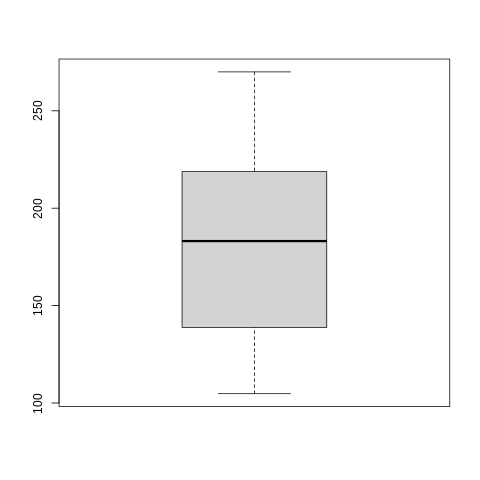

In [ ]:
%%R
#Checking for outliers in the Daily Internet Usage Column
boxplot(advertising_dataset$Daily.Internet.Usage)

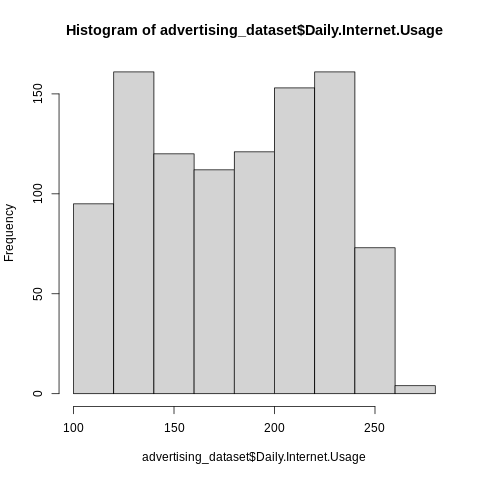

In [ ]:
%%R
#Checking the distribution of Daily Internet Usage
hist(advertising_dataset$Daily.Internet.Usage)

In [ ]:
%%R
#Getting the summary statistics of the numeric variables.
summary(Numeric)

 Daily.Time.Spent.on.Site      Age         Area.Income    Daily.Internet.Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
      Male       Clicked.on.Ad
 Min.   :0.000   Min.   :0.0  
 1st Qu.:0.000   1st Qu.:0.0  
 Median :0.000   Median :0.5  
 Mean   :0.481   Mean   :0.5  
 3rd Qu.:1.000   3rd Qu.:1.0  
 Max.   :1.000   Max.   :1.0  


# **2.Categorical Variable**

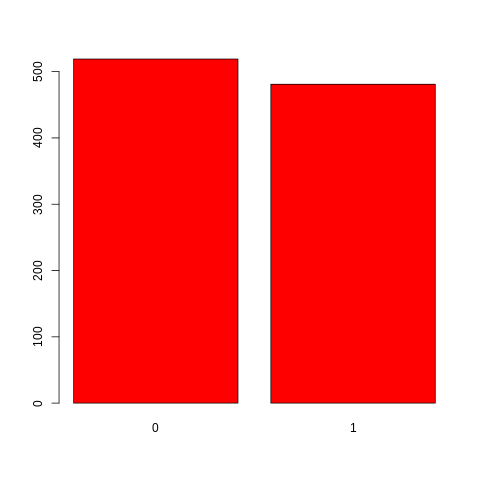

In [ ]:
%%R
Gender <- advertising_dataset$Male
Gender_frequency<- table(Gender)
Gender_frequency
barplot(Gender_frequency,col="Red")


Out of the 1,000 browsing individuals,519 were female whereas 481 were male

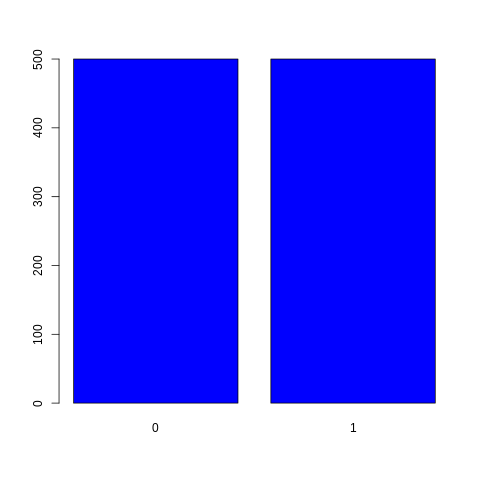

In [ ]:
%%R
Clicked <- advertising_dataset$Clicked.on.Ad
Clicked_frequency<- table(Clicked)
Clicked_frequency
barplot(Clicked_frequency,col="Blue")

Out of the 1,000 browsing individuals,500 people clicked on the advert whereas an equal numeber did not.

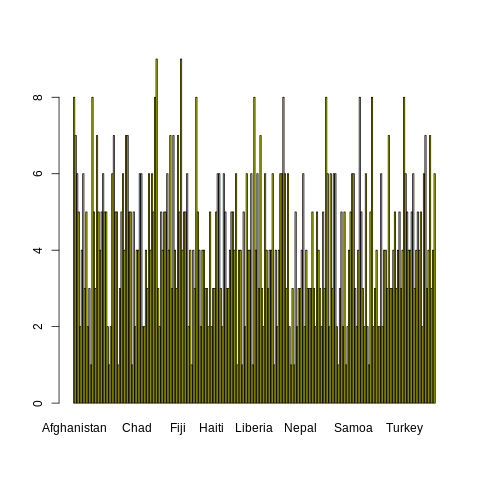

In [ ]:
%%R
Country <- advertising_dataset$Country
Country_frequency<- table(Country)
Country_frequency
barplot(Country_frequency,col="Yellow")

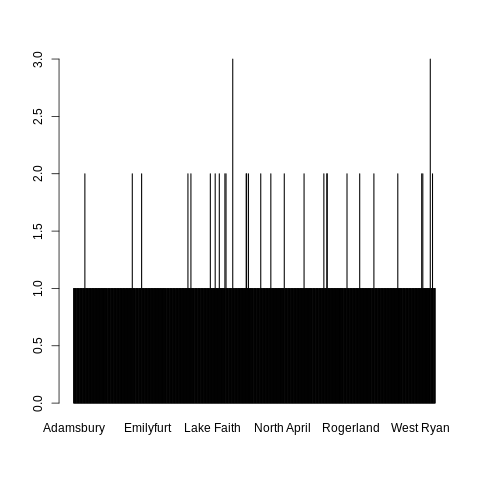

In [ ]:
%%R
City <- advertising_dataset$City
City_frequency<- table(City)
City_frequency
barplot(City_frequency)

In [ ]:
%%R
Topic <- advertising_dataset$Ad.Topic.Line
Topic_frequency<- table(Topic)
Topic_frequency

Topic
                      Adaptive 24hour Graphic Interface 
                                                      1 
                         Adaptive asynchronous attitude 
                                                      1 
                 Adaptive context-sensitive application 
                                                      1 
                Adaptive contextually-based methodology 
                                                      1 
                   Adaptive demand-driven knowledgebase 
                                                      1 
                            Adaptive uniform capability 
                                                      1 
                             Advanced 24/7 productivity 
                                                      1 
                      Advanced 5thgeneration capability 
                                                      1 
                       Advanced didactic conglomeration 
                         

# Bivariate and Multivariate Analysis

# 1.Covariance

In [ ]:
#Checking the covariance between age and the daily time spent on site
%%R
Age<-advertising_dataset$Age
Age
DTSS<-advertising_dataset$Daily.Time.Spent.on.Site
DTSS
cov(Age,DTSS)
#There is a negative covaraiance indicating that high values of the age column vary together with little daily time spent on site.

[1] -46.17415


In [ ]:
#Checking the covariance between age and the daily internet usage
%%R
Age<-advertising_dataset$Age
Age 
DIU1<-advertising_dataset$Daily.Internet.Usage
DIU1
cov(Age,DIU1)
#The higher the age the lower the level of Daily Internet Usage.

[1] -141.6348


In [ ]:
#Checking the covariance between age and the Area Income
%%R
Age<-advertising_dataset$Age
Age
Income<-advertising_dataset$Area.Income
Income
cov(Age,Income)
#The higher the age the lower the Area Income-Negative Covariance.

[1] -21520.93


In [ ]:
#Checking the covariance between Daily Time Spent on Site and the Daily Internet Usage
%%R
cov(DTSS,DIU1)
#The higher the Daily Time Spent on Site the higher the Daily Internet Usage-Positive Covariance.

[1] 360.9919


In [ ]:
%%R
cov(Gender,Clicked)


[1] -0.00950951


In [ ]:
%%R
cov(Clicked,Age)

[1] 2.164665


In [ ]:
%%R
cov(Clicked,DTSS)

[1] -5.933143


In [ ]:
%%R
cov(Clicked,DIU1)

[1] -17.27409


In [ ]:
%%R
cov(Clicked,Income)

[1] -3195.989


In [ ]:
%%R
cov(Numeric)

                         Daily.Time.Spent.on.Site           Age   Area.Income
Daily.Time.Spent.on.Site              251.3370949 -4.617415e+01  6.613081e+04
Age                                   -46.1741459  7.718611e+01 -2.152093e+04
Area.Income                         66130.8109082 -2.152093e+04  1.799524e+08
Daily.Internet.Usage                  360.9918827 -1.416348e+02  1.987625e+05
Male                                   -0.1501864 -9.242142e-02  8.867509e+00
Clicked.on.Ad                          -5.9331431  2.164665e+00 -3.195989e+03
                         Daily.Internet.Usage        Male Clicked.on.Ad
Daily.Time.Spent.on.Site         3.609919e+02 -0.15018639 -5.933143e+00
Age                             -1.416348e+02 -0.09242142  2.164665e+00
Area.Income                      1.987625e+05  8.86750903 -3.195989e+03
Daily.Internet.Usage             1.927415e+03  0.61476667 -1.727409e+01
Male                             6.147667e-01  0.24988889 -9.509510e-03
Clicked.on.Ad         

There are positive covariances between the following variables
1.Area Income and Daily Time Spent on Site
2.Age and Clicking on the Advert.
3.Area Income and Daily Internet Usage.
4.Area Income and Male
5.Daily Internet Usage and Daily Time Spent on Site
6.Male and Daily Internet Usage
7.Clicked on Advert and Age

The rest of the variables exhibit negative Covariances. 

# 2.Correlation

In [ ]:
%%R
cor(Age,DTSS)

[1] -0.3315133


In [ ]:
%%R
cor(Age,DIU1)

[1] -0.3672086


In [ ]:
%%R
cor(Age,Income)

[1] -0.182605


In [ ]:
%%R
cor(Age,Clicked)

[1] 0.4925313


In [ ]:
%%R
cor(DTSS,DIU1)

[1] 0.5186585


In [ ]:
%%R
cor(Gender,Clicked)

[1] -0.03802747


In [ ]:
%%R
cor(Gender,DTSS)

[1] -0.01895085


In [ ]:
%%R
cor(Gender,DIU1)

[1] 0.02801233


In [ ]:
%%R
cor(Clicked,Income)

[1] -0.4762546


In [ ]:
%%R
cor(Numeric)

                         Daily.Time.Spent.on.Site         Age  Area.Income
Daily.Time.Spent.on.Site               1.00000000 -0.33151334  0.310954413
Age                                   -0.33151334  1.00000000 -0.182604955
Area.Income                            0.31095441 -0.18260496  1.000000000
Daily.Internet.Usage                   0.51865848 -0.36720856  0.337495533
Male                                  -0.01895085 -0.02104406  0.001322359
Clicked.on.Ad                         -0.74811656  0.49253127 -0.476254628
                         Daily.Internet.Usage         Male Clicked.on.Ad
Daily.Time.Spent.on.Site           0.51865848 -0.018950855   -0.74811656
Age                               -0.36720856 -0.021044064    0.49253127
Area.Income                        0.33749553  0.001322359   -0.47625463
Daily.Internet.Usage               1.00000000  0.028012326   -0.78653918
Male                               0.02801233  1.000000000   -0.03802747
Clicked.on.Ad                     -0.

There are negative correlations between the following variables
1.Area Income and Daily Time Spent on Site
2.Male and Daily Time Spent on Site
3.Clicking on the Advert and Daily Time Spent on Site.
4.Area Income and Age
5.Daily Internet Usage and Age
6.Male and Age
7.Area Income and Age
8.Area Income and Clicking on the Advert
9.Daily Internet usage and Clicking on the advert.
10.Male and Clicking on the Advert


There are positive Correlations between the following variables:
1.Age and Clicking on the advert
2.Male and Daily Internet Usage
3.Male and Area Income
4.Daily Time Spent on Site and Daily Internet Usage.
5.Area Income and Daily Time Spent on Site
6.Area Income and Daily Internet Usage
7.Area Income and Male
8.Age and Clicking on the Advert.

# 3.Scatter Plots

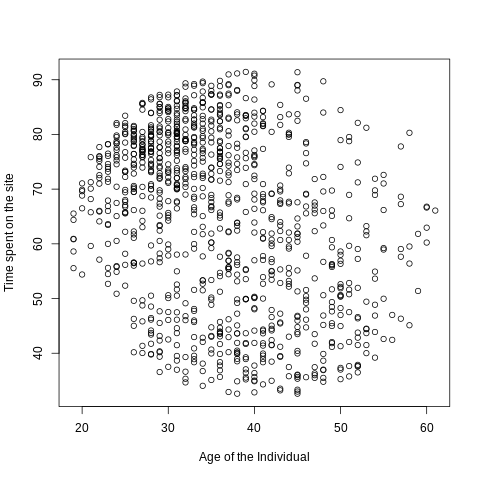

In [ ]:
%%R
plot(Age, DTSS, xlab="Age of the Individual", ylab="Time spent on the site")


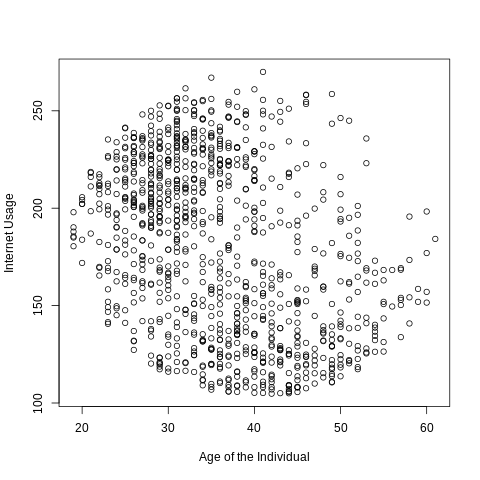

In [ ]:
%%R
plot(Age, DIU1, xlab="Age of the Individual", ylab="Internet Usage")

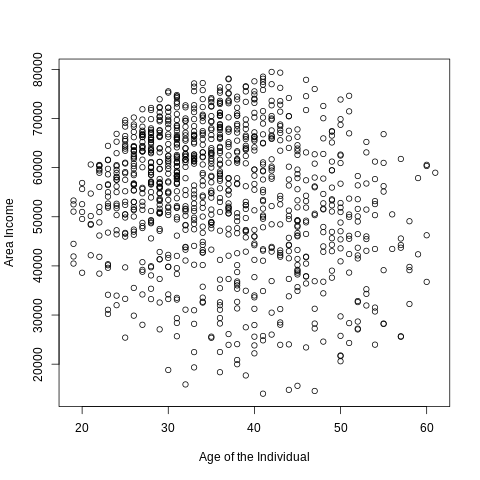

In [ ]:
%%R
plot(Age, Income, xlab="Age of the Individual", ylab="Area Income")

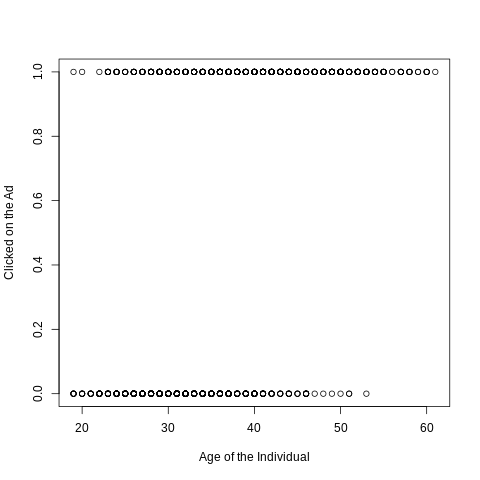

In [ ]:
%%R
plot(Age, Clicked, xlab="Age of the Individual", ylab="Clicked on the Ad")

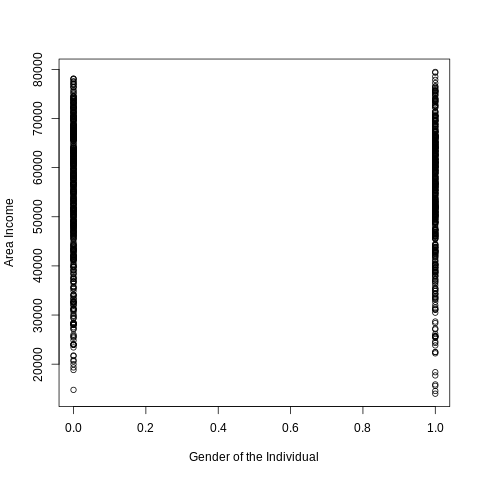

In [ ]:
%%R
plot(Gender, Income, xlab="Gender of the Individual", ylab="Area Income")

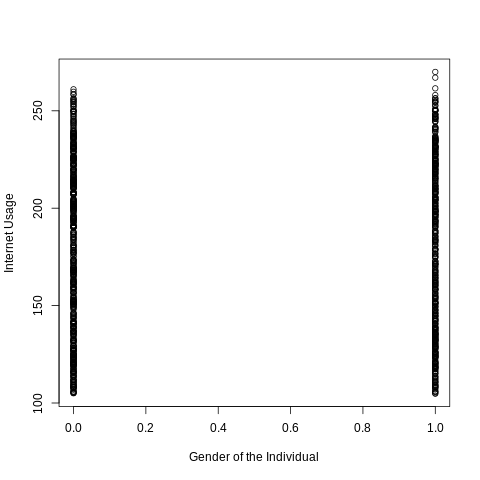

In [ ]:
%%R
plot(Gender, DIU1, xlab="Gender of the Individual", ylab="Internet Usage")

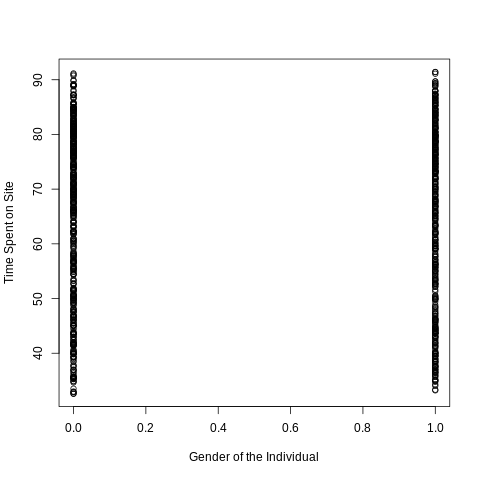

In [ ]:
%%R
plot(Gender, DTSS, xlab="Gender of the Individual", ylab="Time Spent on Site")

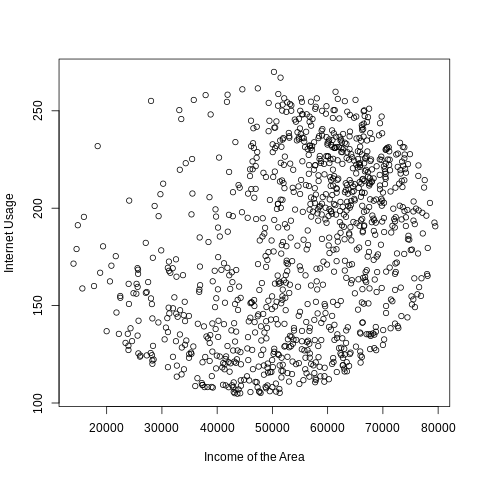

In [ ]:
%%R
plot(Income, DIU1, xlab="Income of the Area", ylab="Internet Usage")

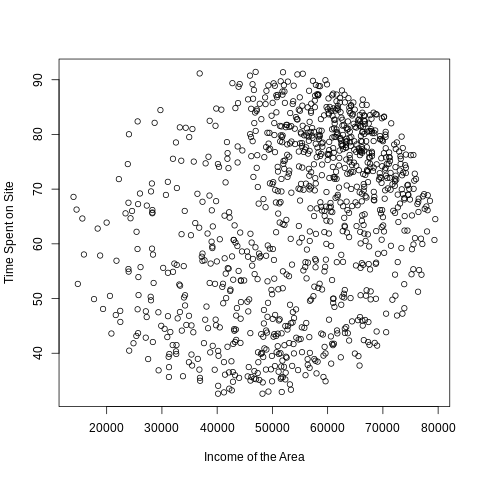

In [ ]:
%%R
plot(Income, DTSS, xlab="Income of the Area", ylab="Time Spent on Site")

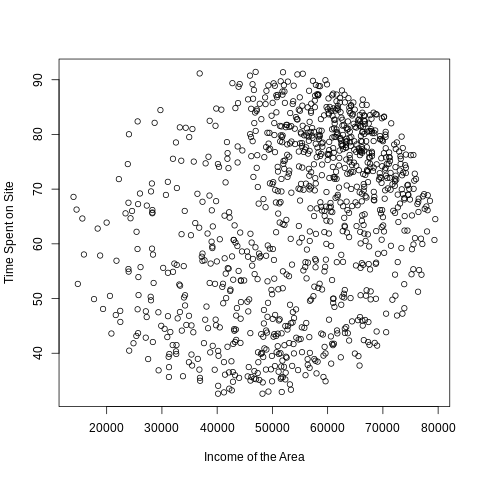

In [ ]:
%%R
plot(Income, DTSS, xlab="Income of the Area", ylab="Time Spent on Site")

In [ ]:
%%R
Survey <- data.frame(Age, Gender, Country, Clicked)
head(Survey)

  Age Gender    Country Clicked
1  35      0    Tunisia       0
2  31      1      Nauru       0
3  26      0 San Marino       0
4  29      1      Italy       0
5  35      0    Iceland       0
6  23      1     Norway       0


In [ ]:
%%R
crosstab(Survey, row.vars = "Age", col.vars = "Gender", type = c("f", "t"), style = "long", 
    addmargins = FALSE)

R[write to console]: Error in crosstab(Survey, row.vars = "Age", col.vars = "Gender", type = c("f",  : 
  could not find function "crosstab"
Calls: <Anonymous> -> <Anonymous> -> withVisible

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In mean.default(advertising_dataset) :
R[write to console]: 
 
R[write to console]:  argument is not numeric or logical: returning NA




Error in crosstab(Survey, row.vars = "Age", col.vars = "Gender", type = c("f",  : 
  could not find function "crosstab"
Calls: <Anonymous> -> <Anonymous> -> withVisible


# Modelling

#1.Multiple Linear Regression
Given that the dependent variable is categorical a linear model would not be appropriate,instead a logistic regression model should be fitted.

In [ ]:
%%R
library(ggplot2) 


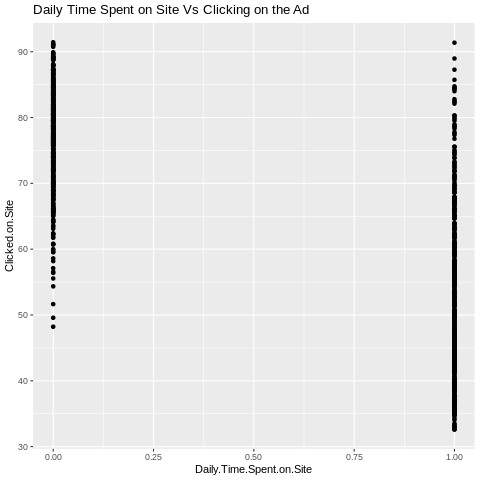

In [ ]:
#Examining the data by plotting a scatter plot in order understand relationships
%%R
ggplot(my_data, aes(Clicked.on.Ad, Daily.Time.Spent.on.Site))+
  geom_point()+
  labs(title = "Daily Time Spent on Site Vs Clicking on the Ad",
       x = "Daily.Time.Spent.on.Site",
       y = "Clicked.on.Site")

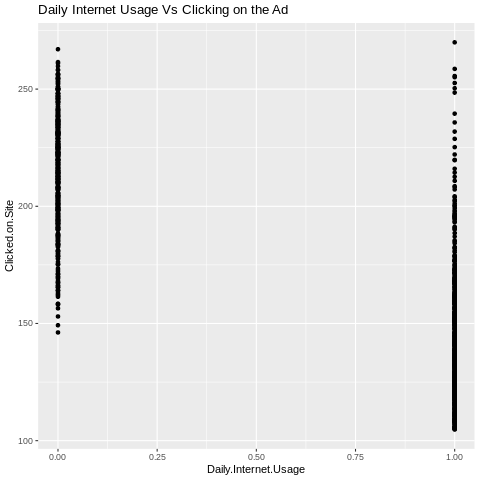

In [ ]:
%%R
ggplot(my_data, aes(Clicked.on.Ad, Daily.Internet.Usage))+
  geom_point()+
  labs(title = "Daily Internet Usage Vs Clicking on the Ad",
       x = "Daily.Internet.Usage",
       y = "Clicked.on.Site")

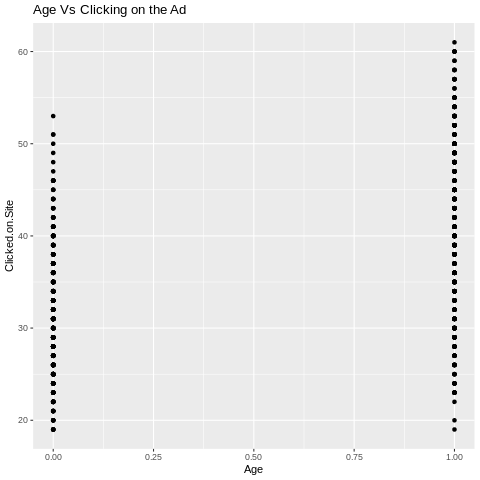

In [ ]:
%%R
ggplot(my_data, aes(Clicked.on.Ad, Age))+
  geom_point()+
  labs(title = "Age Vs Clicking on the Ad",
       x = "Age",
       y = "Clicked.on.Site")

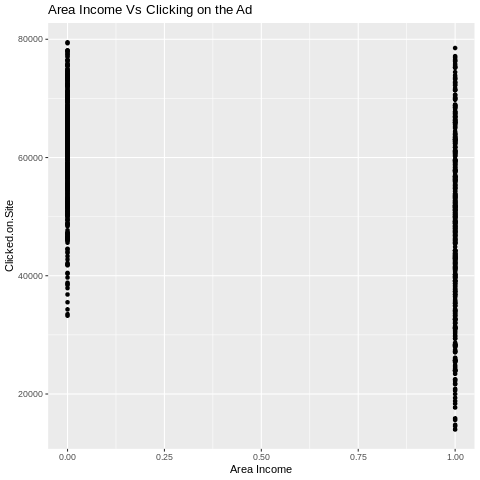

In [ ]:
%%R
ggplot(my_data, aes(Clicked.on.Ad, Area.Income))+
  geom_point()+
  labs(title = "Area Income Vs Clicking on the Ad",
       x = "Area Income",
       y = "Clicked.on.Site")

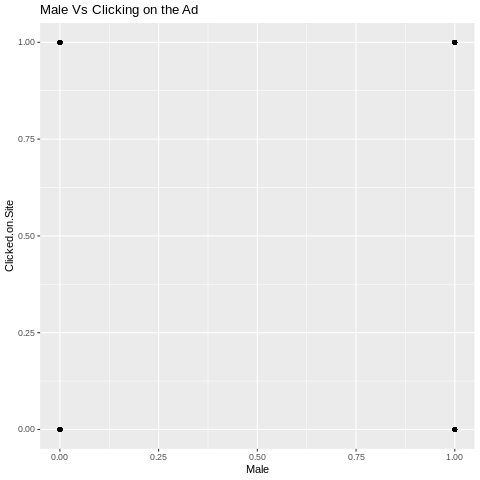

In [ ]:
%%R
ggplot(my_data, aes(Clicked.on.Ad, Male))+
  geom_point()+
  labs(title = "Male Vs Clicking on the Ad",
       x = "Male",
       y = "Clicked.on.Site")

In [ ]:
#Dropping the categorical columns as they will not be applicable in the model
%%R
df <- my_data[ -c(5:6,8:9) ]
df

# A tibble: 1,000 x 6
   Daily.Time.Spent.on…   Age Area.Income Daily.Internet.Us…  Male Clicked.on.Ad
                  <dbl> <int>       <dbl>              <dbl> <int>         <int>
 1                 69.0    35      61834.               256.     0             0
 2                 80.2    31      68442.               194.     1             0
 3                 69.5    26      59786.               236.     0             0
 4                 74.2    29      54806.               246.     1             0
 5                 68.4    35      73890.               226.     0             0
 6                 60.0    23      59762.               227.     1             0
 7                 88.9    33      53853.               208.     0             0
 8                 66      48      24593.               132.     1             1
 9                 74.5    30      68862                222.     1             0
10                 69.9    20      55642.               184.     1             0
# … wi

In [ ]:
#Splitting the dataset into train and test sets 
%%R
set.seed(123)
sample <- sample(c(TRUE, FALSE), nrow(df), replace = T, prob = c(0.6,0.4))
train <- df[sample, ]
test <- df[!sample, ]

In [ ]:
%%R
Multiple_Regression <- lm(Clicked.on.Ad ~ ., train)
Multiple_Regression



Call:
lm(formula = Clicked.on.Ad ~ ., data = train)

Coefficients:
             (Intercept)  Daily.Time.Spent.on.Site                       Age  
               2.328e+00                -1.247e-02                 9.564e-03  
             Area.Income      Daily.Internet.Usage                      Male  
              -6.247e-06                -5.517e-03                -4.900e-02  



The coefficients are as follows:
Intercept=2.328e+00
Area.Income=-6.247e-06- An indication of a negative relationship with the dependent variable.
Daily.Time.Spent.on.Site=-1.247e-02 -An indication of a negative relationship with the dependent variable
Daily.Intenet.Usage=-5.517e-03-An indication of a negative relationship with the dependent variable
Age=9.564e-03-An indication of a positive relationship with the dependent variable
Male=-4.900e-02-An indication of a negative relationship with the dependent variable


The fitted equation is as follows:

Clicked.on.Ad=2.328+00-6.247e-06*Area.Income-1.247e-02*Daily.Time.Spent.on.Site-5.517e-03*Daily.Internet.Usage+9.564e-03*Age-4.900e-02*Male

In [ ]:
%%R
summary(Multiple_Regression)


Call:
lm(formula = Clicked.on.Ad ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50165 -0.12210 -0.03318  0.05956  1.01011 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               2.328e+00  7.398e-02  31.476   <2e-16 ***
Daily.Time.Spent.on.Site -1.247e-02  6.618e-04 -18.848   <2e-16 ***
Age                       9.564e-03  1.072e-03   8.919   <2e-16 ***
Area.Income              -6.247e-06  7.032e-07  -8.885   <2e-16 ***
Daily.Internet.Usage     -5.517e-03  2.391e-04 -23.070   <2e-16 ***
Male                     -4.900e-02  1.727e-02  -2.837   0.0047 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2114 on 601 degrees of freedom
Multiple R-squared:  0.8228,	Adjusted R-squared:  0.8213 
F-statistic:   558 on 5 and 601 DF,  p-value: < 2.2e-16



The R-squared value is 0.8228 which means that 82.28% of deviations in the clicking of the Advert are accounted for by the independent variables in the model which is a good fit.

In [ ]:
%%R
#Getting the confidence interval
confint(Multiple_Regression)

                                 2.5 %        97.5 %
(Intercept)               2.183145e+00  2.473708e+00
Daily.Time.Spent.on.Site -1.377293e-02 -1.117355e-02
Age                       7.457842e-03  1.166958e-02
Area.Income              -7.628286e-06 -4.866408e-06
Daily.Internet.Usage     -5.986346e-03 -5.047085e-03
Male                     -8.291035e-02 -1.508324e-02


In [ ]:
%%R
library(modelr)
library(broom)   

In [ ]:
# Generating the anova table
%%R
anova(Multiple_Regression)


Analysis of Variance Table

Response: Clicked.on.Ad
                          Df Sum Sq Mean Sq   F value    Pr(>F)    
Daily.Time.Spent.on.Site   1 81.141  81.141 1815.0809 < 2.2e-16 ***
Age                        1 10.009  10.009  223.8967 < 2.2e-16 ***
Area.Income                1  9.363   9.363  209.4422 < 2.2e-16 ***
Daily.Internet.Usage       1 23.861  23.861  533.7542 < 2.2e-16 ***
Male                       1  0.360   0.360    8.0507  0.004702 ** 
Residuals                601 26.867   0.045                        
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
#Making predictions
%%R
Value <- data.frame(Daily.Time.Spent.on.Site = 80.23, Age = 31, Area.Income = 8,441.85, Daily.Internet.Usage=193.77,Male=0)
Predicted_Click <- predict(Multiple_Regression, Value)
Predicted_Click
#The model predicts that there will be a click with 55.51% accuracy.

        1 
0.5551495 


In [ ]:
%%R
(test <- test %>% 
  add_predictions(Multiple_Regression))

# A tibble: 393 x 7
   Daily.Time.Spen…   Age Area.Income Daily.Internet.…  Male Clicked.on.Ad
              <dbl> <int>       <dbl>            <dbl> <int>         <int>
 1             80.2    31      68442.             194.     1             0
 2             74.2    29      54806.             246.     1             0
 3             68.4    35      73890.             226.     0             0
 4             66      48      24593.             132.     1             1
 5             47.6    49      45633.             122.     0             1
 6             69.6    48      51637.             113.     1             1
 7             63.4    23      52182.             141.     1             1
 8             74.6    40      23822.             136.     1             1
 9             77.2    30      64802.             224.     1             0
10             84.6    35      60016.             227.     1             0
# … with 383 more rows, and 1 more variable: pred <dbl>


In [ ]:
%%R
#Testing MSE
test %>% 
  add_predictions(Multiple_Regression) %>%
  summarise(MSE = mean((Clicked.on.Ad - pred)^2))

# A tibble: 1 x 1
     MSE
   <dbl>
1 0.0442


In [ ]:
%%R
#Training MSE
train %>% 
  add_predictions(Multiple_Regression) %>%
  summarise(MSE = mean((Clicked.on.Ad - pred)^2))

# A tibble: 1 x 1
     MSE
   <dbl>
1 0.0443


In [ ]:
%%R
#Getting the deviation
RSE<-sigma(Multiple_Regression)
RSE
#The RSE value is 0.2114 meaning that the actual clicks will deviate from the mean by 2.11 on average and when compared to the average value of clicks over all markets the percentage error is 43.65% as shown below.

[1] 0.2114332


In [ ]:
%%R
sigma(Multiple_Regression)/mean(train$Clicked.on.Ad)

[1] 0.4365305


In [ ]:
#Analyzing the F-Statistic
#From the summary of the model,the value is as follow:F-statistic:   558 on 5 and 601 DF,  p-value: < 2.2e-16
#The p-value is <0.05 hence the model is a good fit.

R[write to console]: `geom_smooth()` using formula 'y ~ x'

R[write to console]: `geom_smooth()` using method = 'loess' and formula 'y ~ x'



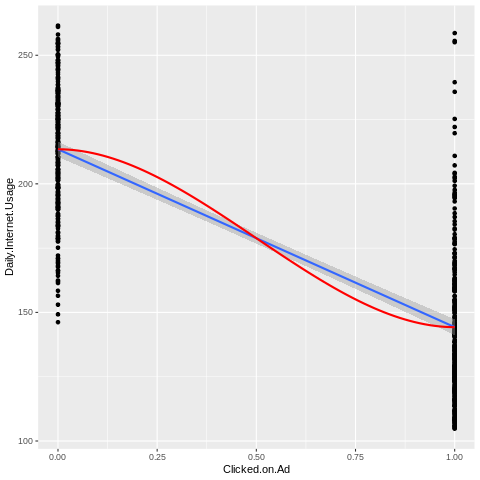

In [ ]:
#Assessing the model's visuality
%%R
ggplot(train, aes(Clicked.on.Ad, Daily.Internet.Usage)) +
  geom_point() +
  geom_smooth(method = "lm") +
  geom_smooth(se = FALSE, color = "red")

R[write to console]: `geom_smooth()` using formula 'y ~ x'

R[write to console]: `geom_smooth()` using method = 'loess' and formula 'y ~ x'



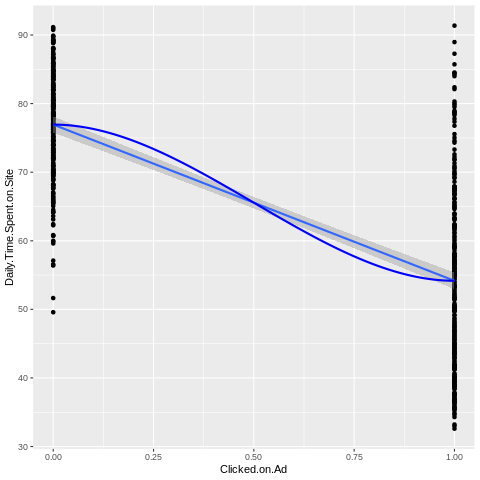

In [ ]:
%%R
ggplot(train, aes(Clicked.on.Ad, Daily.Time.Spent.on.Site)) +
  geom_point() +
  geom_smooth(method = "lm") +
  geom_smooth(se = FALSE, color = "blue")

R[write to console]: `geom_smooth()` using formula 'y ~ x'

R[write to console]: `geom_smooth()` using method = 'loess' and formula 'y ~ x'



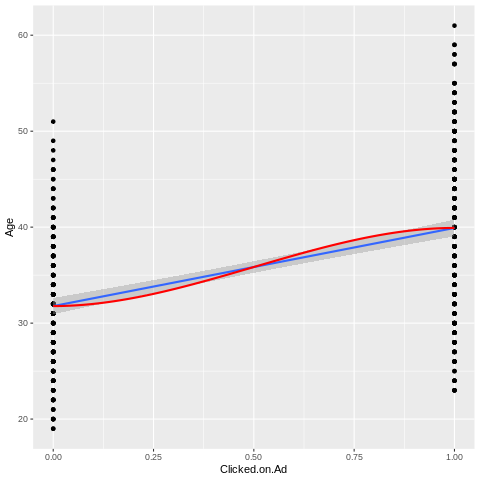

In [ ]:
%%R
ggplot(train, aes(Clicked.on.Ad, Age)) +
  geom_point() +
  geom_smooth(method = "lm") +
  geom_smooth(se = FALSE, color = "red")

R[write to console]: `geom_smooth()` using formula 'y ~ x'

R[write to console]: `geom_smooth()` using method = 'loess' and formula 'y ~ x'



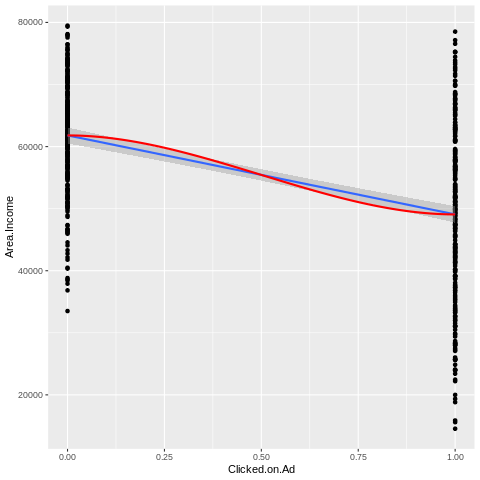

In [ ]:
%%R
ggplot(train, aes(Clicked.on.Ad, Area.Income)) +
  geom_point() +
  geom_smooth(method = "lm") +
  geom_smooth(se = FALSE, color = "red")

# 2.KNN

In [ ]:
%%R
#Finding the structure of  the dataset
str(df)

tibble [1,000 × 6] (S3: tbl_df/tbl/data.frame)
 $ Daily.Time.Spent.on.Site: num [1:1000] 69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int [1:1000] 35 31 26 29 35 23 33 48 30 20 ...
 $ Area.Income             : num [1:1000] 61834 68442 59786 54806 73890 ...
 $ Daily.Internet.Usage    : num [1:1000] 256 194 236 246 226 ...
 $ Male                    : int [1:1000] 0 1 0 1 0 1 0 1 1 1 ...
 $ Clicked.on.Ad           : int [1:1000] 0 0 0 0 0 0 0 1 0 0 ...


In [ ]:
#Normalization
%%R
dfNorm <- as.data.frame(scale(df))
head(dfNorm)

  Daily.Time.Spent.on.Site        Age Area.Income Daily.Internet.Usage
1                0.2491419 -0.1148475  0.50943618            1.7331628
2                0.9606516 -0.5701399  1.00202882            0.3136484
3                0.2819420 -1.1392555  0.35677007            1.2869451
4                0.5771428 -0.7977862 -0.01444841            1.5008289
5                0.2125572 -0.1148475  1.40816290            1.0382112
6               -0.3160289 -1.4807248  0.35495265            1.0646335
        Male Clicked.on.Ad
1 -0.9622138    -0.9994999
2  1.0382307    -0.9994999
3 -0.9622138    -0.9994999
4  1.0382307    -0.9994999
5 -0.9622138    -0.9994999
6  1.0382307    -0.9994999


In [ ]:
%%R
normalize <- function(x) {
return ((x - min(x)) / (max(x) - min(x)))
}

In [ ]:
%%R
df_n <- as.data.frame(lapply(df, normalize))
summary(df_n$Daily.Time.Spent.on.Site)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.3189  0.6054  0.5507  0.7810  1.0000 


In [ ]:
%%R
Train <- df_n[1:200, ]
Test <- df_n[201:393, ]
Train_labels <- Train[1:200, 1]
Test_labels <- Test[201:393, 1]

In [ ]:
#Training the Model
%%R
library(class)    
require(class)
Test_pred <- knn(train = Train, test = Test,
                      cl = Train_labels, k = 21)
Test_pred

  [1] 0.620091789903111  0.883732789393167  0.188169301376849 
  [4] 0.618731939486656  0.670406255311916  0.229984701682815 
  [7] 0.813700492945776  0.908720040795512  0.151113377528472 
 [10] 0.188169301376849  0.813530511643719  0.553969063403026 
 [13] 0.813530511643719  0.38670746217916   0.763386027536971 
 [16] 0.639129695733469  0.567737548869624  0.29712731599524  
 [19] 0.123406425293218  0.151113377528472  0.905320414754377 
 [22] 0.815910249872514  0.316845147033826  0.22709501954785  
 [25] 0.919428862825089  0.553969063403026  0.387387387387387 
 [28] 0.210436851946286  0.704062553119157  0.797552269250382 
 [31] 0.712731599524052  0.10062893081761   0.22709501954785  
 [34] 0.730069692333843  0.303076661567228  0.188169301376849 
 [37] 0.634030256671766  0.60802311745708   0.639129695733469 
 [40] 0.851266360700323  0.469658337582866  0.303076661567228 
 [43] 0.908720040795512  0.97416284208737   0.636240013598504 
 [46] 0.754546999830018  0.39095699473058   0.188169301

In [ ]:
#Model Evaluation
%%R
t<-table(factor(Test_pred))
t
t1<-table(Test_labels,Test_pred)
t1

< table of extent 0 x 192 >


In [ ]:
#Model Improvement
%%R
Test_pred <- knn(train = Train, test = Test,
                      cl = Train_labels, k = 22)
t2<-table(factor(Test_pred))
t2
t3<-table(Test_labels,Test_pred)
t3

< table of extent 0 x 192 >


# 3.Decision Trees

In [ ]:
%%R
#Installing libraries
install.packages('rpart')
install.packages('caret')
install.packages('rpart.plot')
install.packages('rattle')
 
#Loading libraries
library(rpart,quietly = TRUE)
library(caret,quietly = TRUE)
library(rpart.plot,quietly = TRUE)
library(rattle)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/rpart_4.1-15.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 639286 bytes (624 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

In [ ]:
%%R
tree <- rpart(class~.,
data=Train,
parms = list(loss = penalty.matrix),
method = "class")

R[write to console]: Error in model.frame.default(formula = class ~ ., data = Train, na.action = function (x)  : 
  object is not a matrix
Calls: <Anonymous> ... eval.parent -> eval -> eval -> <Anonymous> -> model.frame.default

R[write to console]: In addition: 
R[write to console]: There were 16 warnings (use warnings() to see them)
R[write to console]: 




Error in model.frame.default(formula = class ~ ., data = Train, na.action = function (x)  : 
  object is not a matrix
Calls: <Anonymous> ... eval.parent -> eval -> eval -> <Anonymous> -> model.frame.default


# 4.SVM

In [ ]:
%%R
anyNA(df_n)
#There are no missing values hence we can proceed to model

[1] FALSE


In [ ]:
%%R
install.packages('caret')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/caret_6.0-86.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 5264447 bytes (5.0 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[writ

In [ ]:
%%R
install.packages('kernlab')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/kernlab_0.9-29.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1168376 bytes (1.1 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

In [221]:
%%R
trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)

svm_Linear <- train(Train$Clicked.on.Ad ~., data =Train, method = "svmLinear",
trControl=trctrl,
preProcess = c("center", "scale"),
tuneLength = 10)


R[write to console]: Error in `[.data.frame`(data, , all.vars(Terms), drop = FALSE) : 
  undefined columns selected
Calls: <Anonymous> ... withVisible -> train -> train.formula -> [ -> [.data.frame

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In train.default(x, y, weights = w, ...) :
R[write to console]: 
 
R[write to console]:  You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column.




Error in `[.data.frame`(data, , all.vars(Terms), drop = FALSE) : 
  undefined columns selected
Calls: <Anonymous> ... withVisible -> train -> train.formula -> [ -> [.data.frame


In [220]:
%%R
svm_Linear

R[write to console]: Error in withVisible({ : object 'svm_Linear' not found
Calls: <Anonymous> -> <Anonymous> -> withVisible




Error in withVisible({ : object 'svm_Linear' not found
Calls: <Anonymous> -> <Anonymous> -> withVisible


In [222]:
%%R
test_pred <- predict(svm_Linear, newdata = Test)
test_pred

R[write to console]: Error in predict(svm_Linear, newdata = Test) : 
  object 'svm_Linear' not found
Calls: <Anonymous> -> <Anonymous> -> withVisible -> predict




Error in predict(svm_Linear, newdata = Test) : 
  object 'svm_Linear' not found
Calls: <Anonymous> -> <Anonymous> -> withVisible -> predict


In [ ]:
%%R
confusionMatrix(table(test_pred, Test$Clicked.on.Ad))


# 5.Naive Bayes

In [223]:
%%R
library(e1071)

R[write to console]: Error in library(e1071) : there is no package called ‘e1071’
Calls: <Anonymous> -> <Anonymous> -> withVisible -> library




Error in library(e1071) : there is no package called ‘e1071’
Calls: <Anonymous> -> <Anonymous> -> withVisible -> library


In [224]:
# Checking dimensions of the split
%%R
prop.table(table(df_n$Clicked.on.Ad)) * 100
prop.table(table(df_n$Clicked.on.Ad)) * 100
prop.table(table(df_n$Clicked.on.Ad)) * 100



 0  1 
50 50 


In [226]:
#Creating objects x which holds the predictor variables and y which holds the response variables
%%R
x = Train[,-6]
y = Train$Clicked.on.Ad

In [228]:
%%R
install.packages('klaR')
library(klaR)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘fastmap’, ‘R.cache’, ‘e1071’, ‘shiny’, ‘miniUI’, ‘styler’, ‘classInt’, ‘labelled’, ‘combinat’, ‘questionr’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/R.methodsS3_1.8.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 23717 bytes (23 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R

In [229]:
%%R
model = train(x,y,'nb',trControl=trainControl(method='cv',number=10))

R[write to console]: Error: wrong model type for regression




Error: wrong model type for regression


In [ ]:
# Predicting our testing set
# 
%%R
Predict <- predict(model,newdata = Test )

In [ ]:
%%R
confusionMatrix(Predict, testing$Clicked.on.Ad )

# Observations

The data was clean and complete i.e. contained no outliers and no missing values.

The modal age was 31 years and the range was between 19 and 61.

Most of the individuals spent around 62.26 Minutes on the site.The time ranged from 32.60 minutes to 91.43.

The Average Area Income of the individuals was 55,000 which ranged between 13,996.5 and 79,484.80

The Daily Internet Usage had an average of 180 Mbs and ranged between 104.78 and 269.96

The most frequent cities were; Lake Faith and West Ryan

The most frequent Countries were; Fiji and Chad.

There were positive covariances between the following variables
1.Area Income and Daily Time Spent on Site
2.Age and Clicking on the Advert.
3.Area Income and Daily Internet Usage.
4.Area Income and Male
5.Daily Internet Usage and Daily Time Spent on Site
6.Male and Daily Internet Usage
7.Clicked on Advert and Age

The rest of the variables exhibit negative Covariances.

The number of females was more than that of male counterparts.

The number of individuals who clicked on the advert and those who didn't were equal at 500.


There are negative correlations between the following variables
1.Area Income and Daily Time Spent on Site
2.Male and Daily Time Spent on Site
3.Clicking on the Advert and Daily Time Spent on Site.
4.Area Income and Age
5.Daily Internet Usage and Age
6.Male and Age
7.Area Income and Age
8.Area Income and Clicking on the Advert
9.Daily Internet usage and Clicking on the advert.
10.Male and Clicking on the Advert


There were positive Correlations between the following variables:
1.Age and Clicking on the advert
2.Male and Daily Internet Usage
3.Male and Area Income
4.Daily Time Spent on Site and Daily Internet Usage.
5.Area Income and Daily Time Spent on Site
6.Area Income and Daily Internet Usage
7.Area Income and Male
8.Age and Clicking on the Advert.





# Conclusion
Given the above background,we conclude that following characteristics would help identify an individual who would click on the ad:
1. Daily Time Spent on Site-the higher the time the lower the chances of clicking.
2.Age-The higher the Age the Higher the chances.
3.Area Income-The lower the income the higher the chances.
4.Daily Internet Usage-The lower the Internet Usage the higher the chances.

# Recommendation
It was hard to analyze the Ad Topic Line column as it had various different themes.In order to analyze this effectively,the major themes should be identified and used for coding the rest.